In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

C:\Users\abhim\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Feature Scaling

In [4]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [5]:
def generate_classifier_report(actual_y, predicted_y):
    print("model_accuracy = " , accuracy_score(actual_y, predicted_y))
    print("model_precision = " ,precision_score(actual_y, predicted_y))
    print("model_recall = " ,recall_score(actual_y, predicted_y))
    print("F1 Score = " ,f1_score(actual_y, predicted_y))
    pass

In [6]:
def generate_auc_roc_curve_report(clf, X_test):
    y_pred_probability = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_probability)
    auc = roc_auc_score(y_test, y_pred_probability)
    plt.plot(fpr,tpr,label="Area Under the curve AUC/ROC ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [7]:
def generate_precision_recall_curve(clf, X_test):
    y_pred_probability = clf.predict_proba(X_test)[:,1]
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_probability)
    avg_pre = average_precision_score(y_test, y_pred_probability)
    plt.plot(precision, recall, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
    plt.xlabel('Precision', fontsize = 14)
    plt.ylabel('Recall', fontsize = 14)
    plt.title('Precision-Recall Curve', fontsize = 18)
    plt.legend(loc = 'best')
    #find default threshold
    close_default = np.argmin(np.abs(thresholds_pr - 0.5))
    plt.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

In [8]:
target_variable = 'Class'

In [9]:
X = df_scaled.loc[:, df_scaled.columns!=target_variable]

In [10]:
Y = df_scaled.loc[:, df_scaled.columns==target_variable]

In [11]:
# split the data into training, validation and test data in the ratio 70:10:20
def data_split(X=X,Y=Y,split_ratio=[0.7,0.1,0.2]):
    from sklearn.model_selection import train_test_split
    X_train, X_tmp, y_train, y_tmp = train_test_split(X, Y, test_size=(split_ratio[1]+split_ratio[2])/(split_ratio[0]+split_ratio[1]+split_ratio[2]), random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_tmp,y_tmp, test_size = split_ratio[2]/(split_ratio[1]+split_ratio[2]),random_state=42)
    
    return X_train, X_valid, X_test, y_train,y_valid, y_test

X_train, X_valid, X_test, y_train,y_valid, y_test = data_split(X, Y, split_ratio=[0.7,0.1,0.2])

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(199364, 30) (28481, 30) (56962, 30)
(199364, 1) (28481, 1) (56962, 1)


0    284315
1       492
Name: Class, dtype: int64


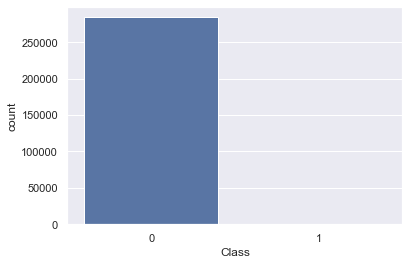

In [12]:
ax = sns.countplot(x=target_variable, data=df_scaled)
print(df_scaled[target_variable].value_counts())

In [13]:
#percentage contribution of majority class - 0
100* (284315/float(df_scaled.shape[0]))

99.82725143693798

In [14]:
#percentage contribution of minority class -1
100* (492/float(df_scaled.shape[0]))

0.1727485630620034

# Logistic Regression Without Resampling

In [15]:
#logistic regression classifier which doesn't account resampling
clf = LogisticRegression().fit(X_train, y_train)

In [16]:
Y_Test_Predicted = clf.predict(X_test)

In [17]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,56876,26
1,6,54


In [18]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9994382219725431
model_precision =  0.9
model_recall =  0.675
F1 Score =  0.7714285714285714


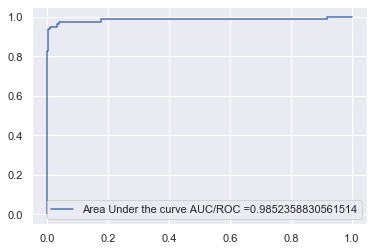

In [19]:
generate_auc_roc_curve_report(clf, X_test)

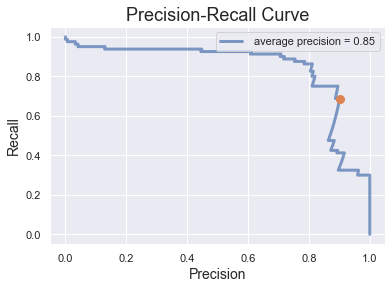

In [20]:
generate_precision_recall_curve(clf, X_test)

# Balanced class weights

In [21]:
distinct_classes = list(df_scaled[target_variable].unique())
distinct_classes

[0, 1]

In [22]:
out_dictionary = {}
for classes in distinct_classes:
    out_dictionary[classes] = df_scaled.shape[0]/((df_scaled.loc[df_scaled[target_variable] == classes].shape[0])
                                     *len(distinct_classes))

In [23]:
out_dictionary

{0: 0.5008652375006595, 1: 289.4380081300813}

In [24]:
print (X_train.shape, y_train.shape)

(199364, 30) (199364, 1)


In [25]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

In [26]:
from sklearn.utils import class_weight

In [27]:
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train[target_variable])

array([  0.50089444, 280.00561798])

In [28]:
Y_Test_Predicted = clf.predict(X_test)

In [29]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,55445,3
1,1437,77


In [30]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9747199887644394
model_precision =  0.05085865257595773
model_recall =  0.9625
F1 Score =  0.09661229611041407


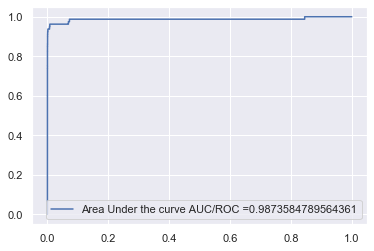

In [31]:
generate_auc_roc_curve_report(clf, X_test)

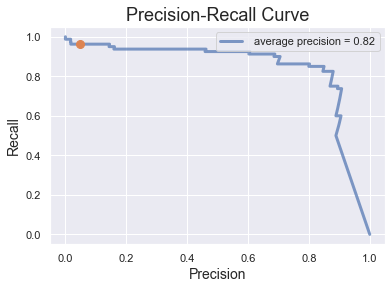

In [32]:
generate_precision_recall_curve(clf, X_test)

# Hyper Parameter Tuning on Class Weights = Balanced

In [33]:
class_weights = np.linspace(0.05, 0.99, 20)
gscv = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in class_weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gscv.fit(X_train, y_train)
print("Best Class Parameters : %s" % grid_result.best_params_)

Best Class Parameters : {'class_weight': {0: 0.19842105263157894, 1: 0.8015789473684211}}


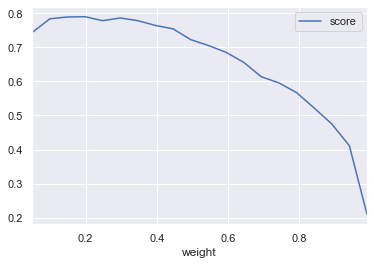

In [34]:
data_output = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': class_weights })
data_output.plot(x='weight')

In [35]:
data_output

,score,weight
0,0.743407,0.050000
1,0.783580,0.099474
2,0.788924,0.148947
3,0.789730,0.198421
4,0.778026,0.247895
5,0.785958,0.297368
6,0.777956,0.346842
7,0.764092,0.396316
8,0.753915,0.445789
9,0.722280,0.495263


In [36]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, y_train)

In [37]:
Y_Test_Predicted = clf.predict(X_test)

In [38]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,56864,11
1,18,69


In [39]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9994908886626171
model_precision =  0.7931034482758621
model_recall =  0.8625
F1 Score =  0.8263473053892216


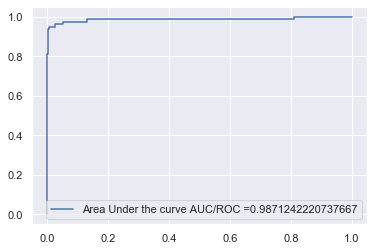

In [40]:
generate_auc_roc_curve_report(clf, X_test)

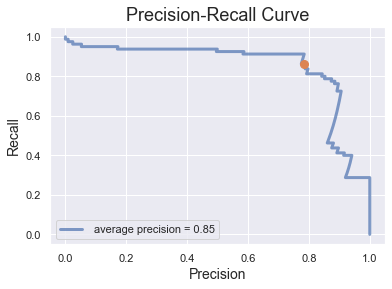

In [42]:
generate_precision_recall_curve(clf, X_test)

# SMOTE

In [43]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_distinct_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_distinct_value_count

{0: 199008, 1: 356}

In [44]:
sm1 = SMOTE(random_state=12, ratio = 1.0) #ratio = 1 as it creates minority class samples = majority class samples
x_train_result, y_train_result = sm1.fit_sample(X_train, y_train)

In [45]:
unique, count = np.unique(y_train_result, return_counts=True)
y_train_after_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_after_smote_value_count

{0: 199008, 1: 199008}

In [46]:
clf = LogisticRegression().fit(x_train_result, y_train_result)

In [47]:
Y_Test_Predicted = clf.predict(X_test)

In [48]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,55345,3
1,1537,77


In [49]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9729644324286366
model_precision =  0.04770755885997522
model_recall =  0.9625
F1 Score =  0.09090909090909091


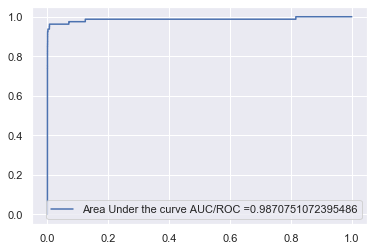

In [50]:
generate_auc_roc_curve_report(clf, X_test)

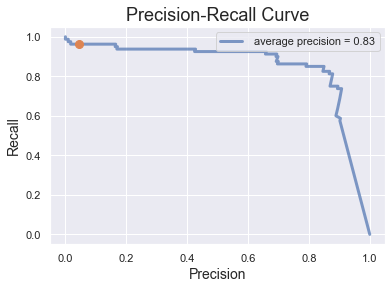

In [51]:
generate_precision_recall_curve(clf, X_test)

# Hyper parameter tuning on SMOTE

In [52]:
class_weights = np.linspace(0.005, 0.25, 10)
class_weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

# Pipeline of SMOTE and Logistic Regression

Best Class Parameters : {'smote__ratio': 0.005}


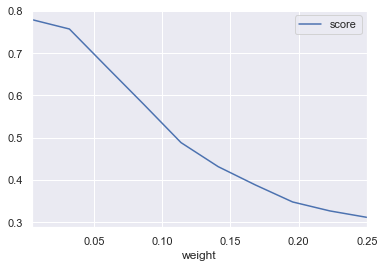

In [53]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

class_weights = np.linspace(0.005, 0.25, 10)

gscv = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': class_weights
    },
    scoring='f1',
    cv=3
)
grid_result = gscv.fit(X_train, y_train)

print("Best Class Parameters : %s" % grid_result.best_params_)
weight_f1_score_data = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': class_weights })
weight_f1_score_data.plot(x='weight')

In [54]:
pipe = make_pipeline(
    SMOTE(ratio=0.005),
    LogisticRegression()
)

pipe.fit(X_train, y_train)

Y_Test_Predicted = pipe.predict(X_test)

In [55]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,56865,13
1,17,67


In [56]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9994733330992591
model_precision =  0.7976190476190477
model_recall =  0.8375
F1 Score =  0.8170731707317073


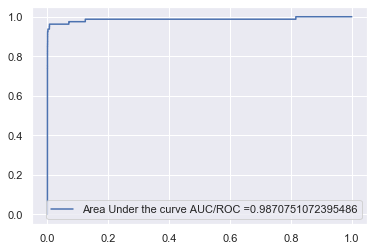

In [57]:
generate_auc_roc_curve_report(clf, X_test)

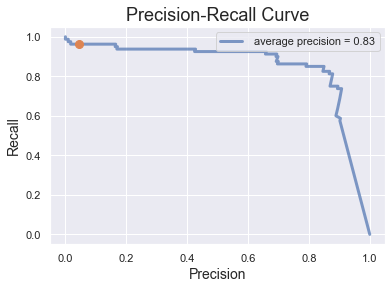

In [58]:
generate_precision_recall_curve(clf, X_test)

# Undersampling

In [59]:
minority_class_len = len(df_scaled[df_scaled[target_variable] == 1])
print(minority_class_len)

492


In [60]:
majority_class_indices = df_scaled[df_scaled[target_variable] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [61]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

492


In [62]:

minority_class_indices = df_scaled[df_scaled[target_variable] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [63]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [64]:
under_sample = df_scaled.loc[under_sample_indices]

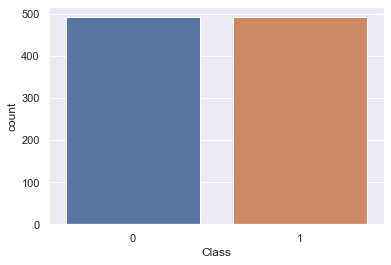

In [65]:
sns.countplot(x=target_variable, data=under_sample)

In [66]:
X = under_sample.loc[:, df_scaled.columns!=target_variable]
Y = under_sample.loc[:, df_scaled.columns==target_variable]


def data_split(X=X,Y=Y,split_ratio=[0.7,0.1,0.2]):
    from sklearn.model_selection import train_test_split
    X_train, X_tmp, y_train, y_tmp = train_test_split(X, Y, test_size=(split_ratio[1]+split_ratio[2])/(split_ratio[0]+split_ratio[1]+split_ratio[2]), random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_tmp,y_tmp, test_size = split_ratio[2]/(split_ratio[1]+split_ratio[2]),random_state=42)
    
    return X_train, X_valid, X_test, y_train,y_valid, y_test

X_train, X_valid, X_test, y_train,y_valid, y_test = data_split(X, Y, split_ratio=[0.7,0.1,0.2])

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)


(688, 30) (98, 30) (198, 30)
(688, 1) (98, 1) (198, 1)


In [67]:
clf = LogisticRegression().fit(X_train, y_train)
Y_Test_Predicted = clf.predict(X_test)

In [68]:
pd.crosstab(Y_Test_Predicted, y_test[target_variable], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,92,8
1,3,95


In [69]:
generate_classifier_report(y_test, Y_Test_Predicted)

model_accuracy =  0.9444444444444444
model_precision =  0.9693877551020408
model_recall =  0.9223300970873787
F1 Score =  0.9452736318407962


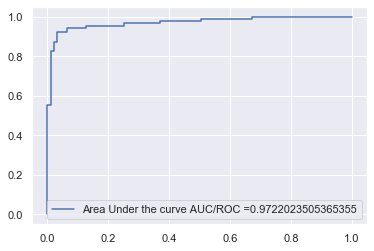

In [70]:
generate_auc_roc_curve_report(clf, X_test)

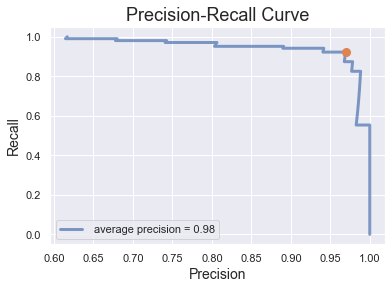

In [71]:
generate_precision_recall_curve(clf, X_test)

Conclusion: Logistic Regression for Balanced class weight with Gridsearchcv performed the best disreagrding the downsampling technique.